## Análisis exploratorio de datos

In [4]:
# importar librearias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar los datasets
calls_info_df_c = pd.read_csv('../datasets/clean/calls_info_df_clean.csv')
clients_df_c = pd.read_csv('../datasets/clean/clients_df_clean.csv')

             user_id   calls_count  call_duration  total_call_duration
count   49002.000000  49002.000000   49002.000000         49002.000000
mean   167294.892759     16.462777     866.282091          1156.558202
std       598.558965     63.604098    3775.503352          4451.473661
min    166377.000000      1.000000       0.000000             0.000000
25%    166782.000000      1.000000       0.000000            46.000000
50%    167158.000000      4.000000      37.000000           208.000000
75%    167819.000000     12.000000     570.000000           901.000000
max    168606.000000   4817.000000  144395.000000        166155.000000
2019-11-28
2019-08-02


/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40973/1356374765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_missed_call', data=calls_info_df_c, palette='Set2')


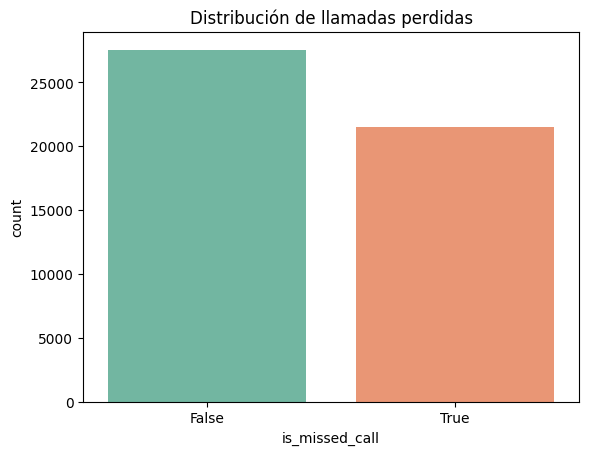

In [8]:
# Estadísticas descriptivas
print(calls_info_df_c.describe())
print(calls_info_df_c['date'].max())
print(calls_info_df_c['date'].min())

# Distribución de llamadas perdidas
sns.countplot(x='is_missed_call', data=calls_info_df_c, palette='Set2')
plt.title('Distribución de llamadas perdidas')
plt.show()

/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40973/2457833470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='direction', data=calls_info_df_c, palette='Set2')


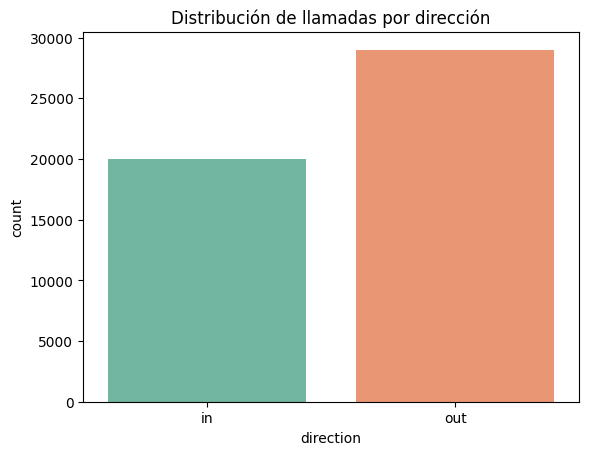

In [9]:
# Gráfico de barras para 'direction'
sns.countplot(x='direction', data=calls_info_df_c, palette='Set2')
plt.title('Distribución de llamadas por dirección')
plt.show()

/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40973/1659080247.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='internal', data=calls_info_df_c, palette='Set2')


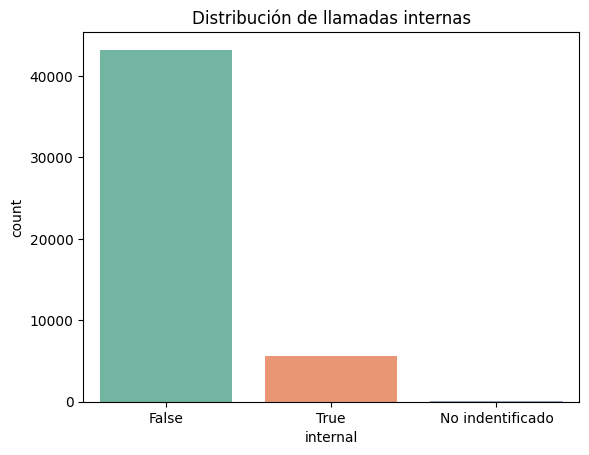

In [10]:
sns.countplot(x='internal', data=calls_info_df_c, palette='Set2')
plt.title('Distribución de llamadas internas')
plt.show()

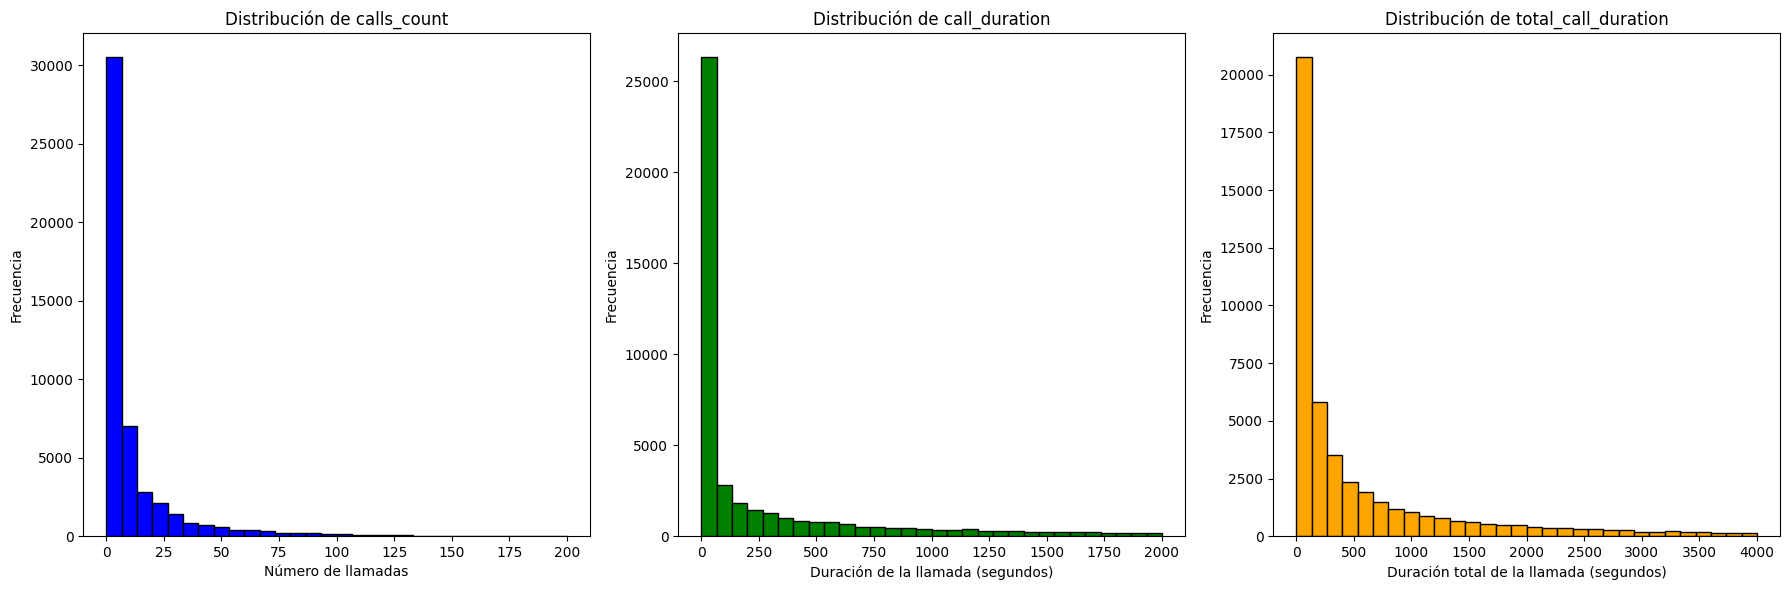

In [11]:
# crear un hisograma para los cantidad de llamadas, duración y total con el tiempo de espera.
plt.figure(figsize=(18, 6))

# Histograma para 'calls_count'
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer gráfico
plt.hist(calls_info_df_c['calls_count'], bins=30, color='blue', edgecolor='black', range=(0, 200))  # Limitar el rango para mayor claridad
plt.title('Distribución de calls_count')
plt.xlabel('Número de llamadas')
plt.ylabel('Frecuencia')

# Histograma para 'call_duration'
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo gráfico
plt.hist(calls_info_df_c['call_duration'], bins=30, color='green', edgecolor='black', range=(0, 2000))  # Limitar el rango para mayor claridad
plt.title('Distribución de call_duration')
plt.xlabel('Duración de la llamada (segundos)')
plt.ylabel('Frecuencia')

# Histograma para 'total_call_duration'
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer gráfico
plt.hist(calls_info_df_c['total_call_duration'], bins=30, color='orange', edgecolor='black', range=(0, 4000))  # Limitar el rango para mayor claridad
plt.title('Distribución de total_call_duration')
plt.xlabel('Duración total de la llamada (segundos)')
plt.ylabel('Frecuencia')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

Distribución de llamadas perdidas vs. recibidas:
Aunque el número de llamadas perdidas es menor en comparación con las recibidas, sigue siendo considerable. Esto nos puede sugerir que la cantidad de operadores actuales podría ser insuficiente para manejar el volumen total de llamadas entrantes, lo que resulta en una proporción significativa de llamadas perdidas.

Llamadas realizadas vs. recibidas por operadores:
Los operadores realizan más llamadas de las que reciben, pero la diferencia no es significativa. Esto indica que, aunque los operadores están activos haciendo llamadas salientes, y que también dedican una parte importante de su tiempo a atender llamadas entrantes.

Llamadas internas:
El número de llamadas internas es muy bajo en comparación con las llamadas entrantes y salientes.

Métricas clave:
La media del total de llamadas es de 16.46, lo que indica un volumen moderado de actividad por operador. La duración promedio de una llamada es de 866.28 segundos (aproximadamente 14.5 minutos), mientras que el tiempo total promedio (incluyendo el tiempo de espera) es de 1156.55 segundos (aproximadamente 19 minutos).

Esto nos sugiere que el tiempo de espera representa una parte significativa de la duración total de las llamadas.

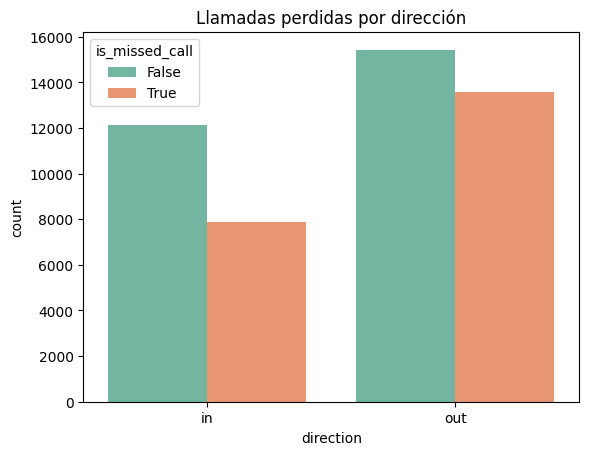

In [12]:
# Gráfico de barras agrupado
sns.countplot(x='direction', hue='is_missed_call', data=calls_info_df_c, palette='Set2')
plt.title('Llamadas perdidas por dirección')
plt.show()

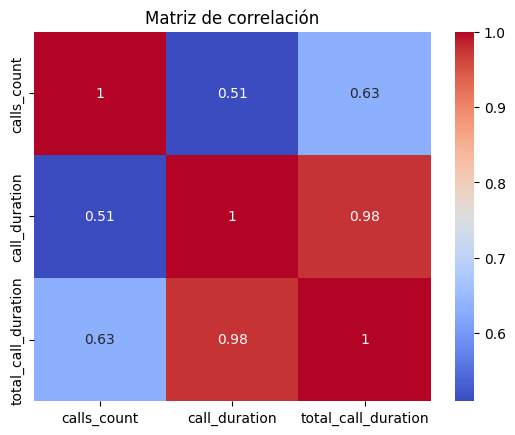

In [13]:
# Matriz de correlación
corr_matrix = calls_info_df_c[['calls_count', 'call_duration', 'total_call_duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

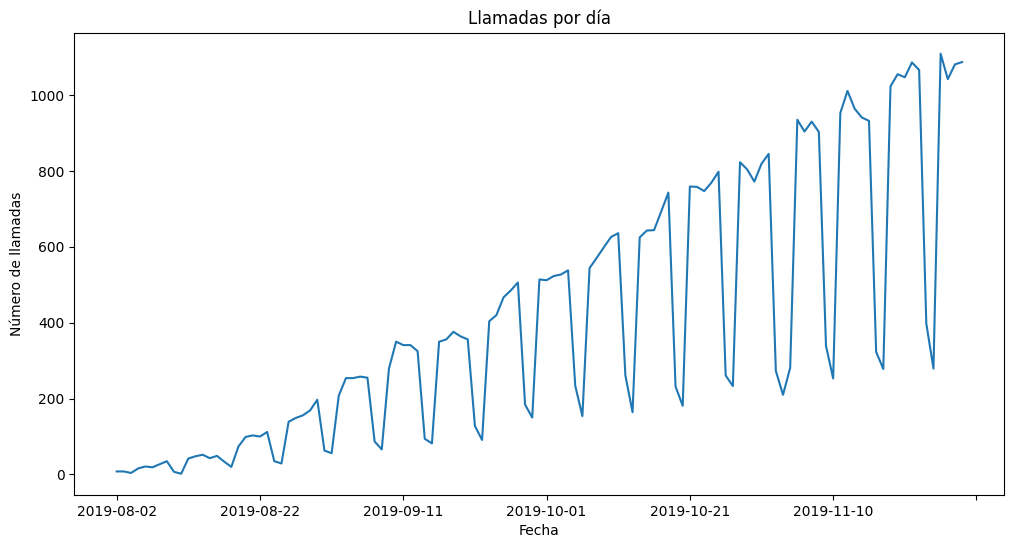

In [14]:
# Agrupar por fecha y contar llamadas
calls_by_date = calls_info_df_c.groupby('date').size()

# Gráfico de series temporales
calls_by_date.plot(figsize=(12, 6))
plt.title('Llamadas por día')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

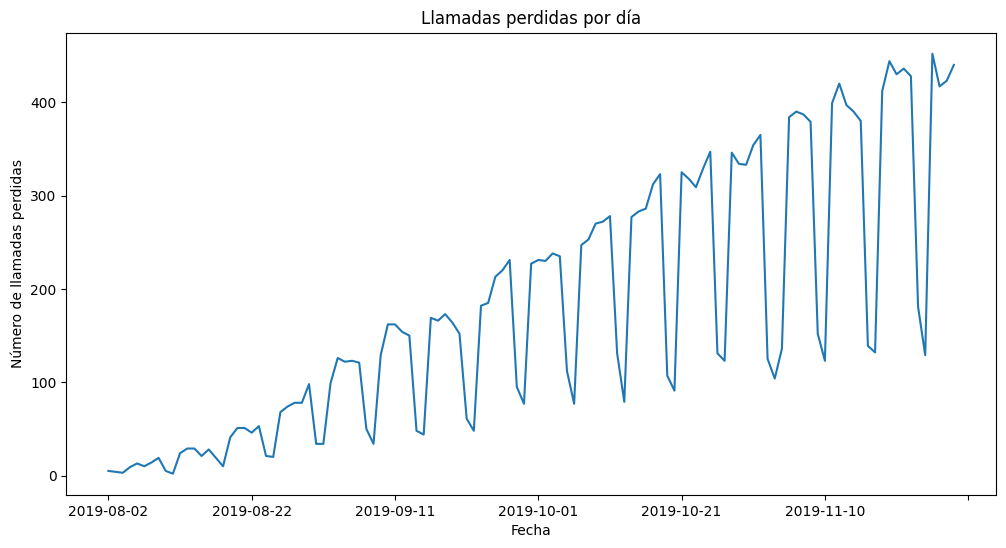

In [15]:
# Agrupar por fecha y contar llamadas perdidas
missed_calls_by_date = calls_info_df_c[calls_info_df_c['is_missed_call']].groupby('date').size()

# Gráfico de series temporales
missed_calls_by_date.plot(figsize=(12, 6))
plt.title('Llamadas perdidas por día')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas perdidas')
plt.show()

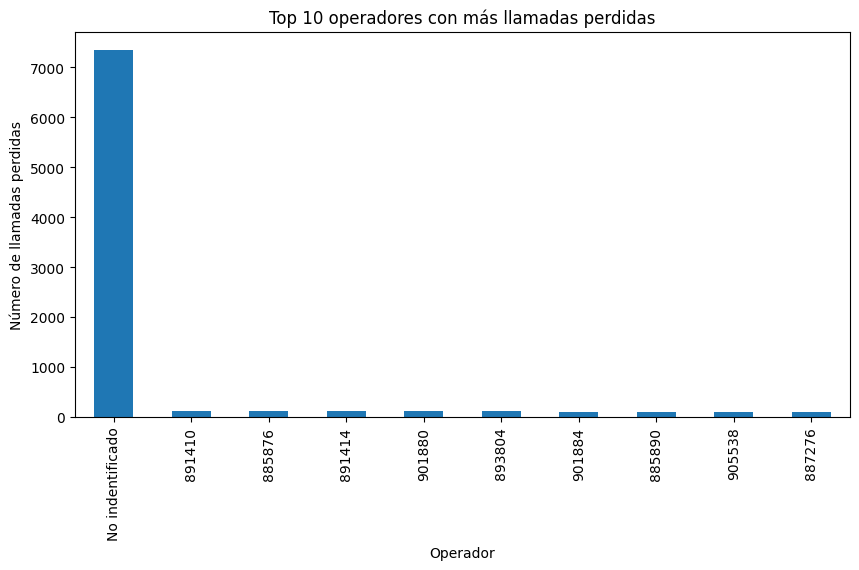

In [16]:
# Agrupar por operador y contar llamadas perdidas
missed_calls_by_operator = calls_info_df_c[calls_info_df_c['is_missed_call']].groupby('operator_id').size()

# Gráfico de barras
missed_calls_by_operator.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 operadores con más llamadas perdidas')
plt.xlabel('Operador')
plt.ylabel('Número de llamadas perdidas')
plt.show()

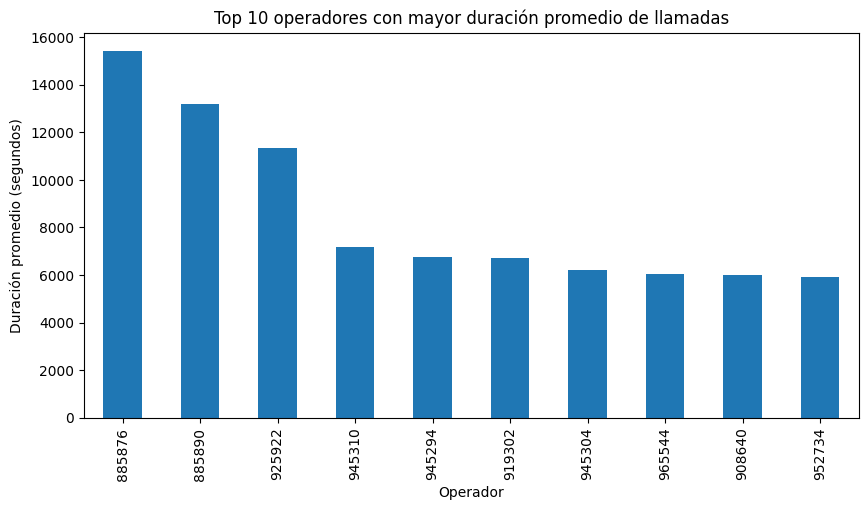

In [17]:
# Agrupar por operador y calcular duración promedio
avg_duration_by_operator = calls_info_df_c.groupby('operator_id')['call_duration'].mean()

# Gráfico de barras
avg_duration_by_operator.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 operadores con mayor duración promedio de llamadas')
plt.xlabel('Operador')
plt.ylabel('Duración promedio (segundos)')
plt.show()

/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40973/3566265013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_distribution.index, y=plan_distribution.values, palette='viridis')


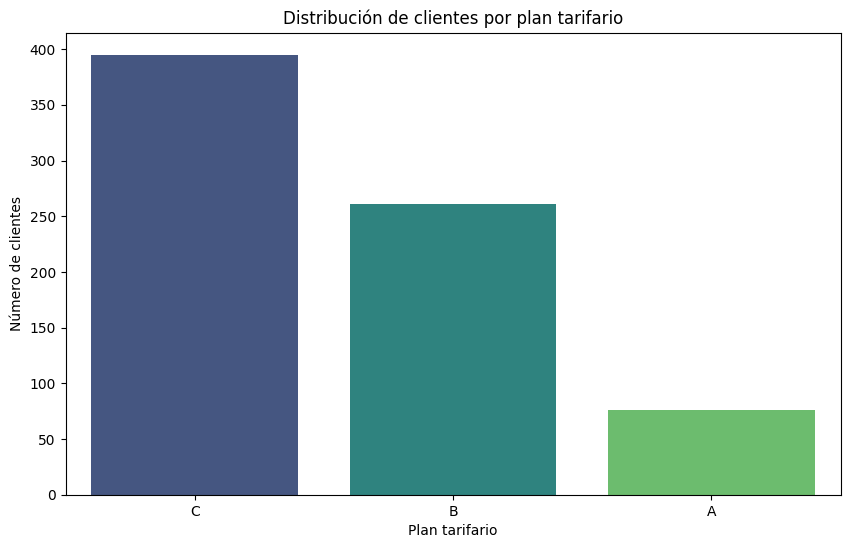

In [18]:
# Contar cuántos clientes hay en cada plan tarifario
plan_distribution = clients_df_c['tariff_plan'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=plan_distribution.index, y=plan_distribution.values, palette='viridis')
plt.title('Distribución de clientes por plan tarifario')
plt.xlabel('Plan tarifario')
plt.ylabel('Número de clientes')
plt.show()

In [19]:
# Calcular el porcentaje de clientes en cada plan
plan_percentage = clients_df_c['tariff_plan'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Porcentaje de clientes por plan tarifario:")
print(plan_percentage)

Porcentaje de clientes por plan tarifario:
tariff_plan
C    53.961749
B    35.655738
A    10.382514
Name: proportion, dtype: float64


Llamadas perdidas entrantes vs. salientes:
Las llamadas perdidas, tanto entrantes como salientes, tienden a mantener una proporción similar, aunque la mayoría de las llamadas se concretan, el número de llamadas perdidas sigue siendo considerable. Esto podría indicar que, independientemente de la dirección de la llamada, hay problemas persistentes en la demanda de llamadas y operadores.

Correlación entre duración de la llamada y duración total:
Existe una fuerte correlación entre la duración de la llamada y la duración total, esto se podria esperar, ya que la duración total incluye el tiempo de la llamada más el tiempo de espera. Sin embargo, esta relación nos confirma que el tiempo de espera es un factor que contribuye a la duración total.

Llamadas a lo largo del tiempo:
El número total de llamadas ha ido en aumento a lo largo del tiempo, lo que indica un crecimiento en la demanda del servicio. Sin embargo, las llamadas perdidas también han aumentado, lo que sugiere que los recursos no estan escalando al mismo ritmo que la demanda.

Distribución de llamadas perdidas entre operadores:
La mayoría de los operadores tienen una cantidad similar de llamadas perdidas, lo que indica que el problema no está concentrado en unos pocos, sino que es general.

Top 10 de operadores:
Dentro del top 10 de operadores, tres destacan por tener una duración promedio de llamada significativamente mayor que los demás. Esto podría indicar que estos operadores están teniendo problemas en cerrar las llamadas o que estas llamadas podrian ser más complejas.